In [1]:
# Dependencies
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import CSVs
salary_file = "./resources/teacher-salary-2017.csv"
academic_file = "./resources/academic-performance-2017.csv"

In [3]:
# Convert CSVs to Dataframes
salary_df = pd.read_csv(salary_file)
academic_df = pd.read_csv(academic_file)

In [4]:
# Show initial salary DataFrame
salary_df

,State,1969-70,1979-80,1989-90,1999-2000,2009-10,2015-16,2016-17,1969-70.1,1979-80.1,1989-90.1,1999-2000.1,2009-10.1,2015-16.1,2016-17.1
0,Alabama,"6,818","13,060","24,828","36,689","47,571","48,518","48,868","43,797","40,821","47,448","52,588","53,260","49,410","48,868"
1,Alaska,"10,560","27,210","43,153","46,462","59,672","67,443","68,138","67,834","85,050","82,468","66,597","66,809","68,684","68,138"
2,Arizona,"8,711","15,054","29,402","36,902","46,952","47,218","47,403","55,957","47,054","56,189","52,894","52,567","48,087","47,403"
3,Arkansas,"6,307","12,299","22,352","33,386","46,700","48,218","48,616","40,514","38,443","42,716","47,854","52,285","49,105","48,616"
4,California,"10,315","18,020","37,998","47,680","68,203","77,179","78,711","66,261","56,325","72,616","68,342","76,360","78,599","78,711"
5,Colorado,"7,761","16,205","30,758","38,163","49,202","46,155","46,506","49,854","50,652","58,780","54,701","55,086","47,004","46,506"
6,Connecticut,"9,262","16,229","40,461","51,780","64,350","72,013","72,561","59,496","50,727","77,323","74,219","72,046","73,338","72,561"
7,Delaware,"9,015","16,148","33,377","44,435","57,080","59,960","60,214","57,910","50,473","63,785","63,691","63,907","61,063","60,214"
8,District of Columbia,"10,285","22,190","38,402","47,076","64,548","75,810","76,131","66,068","69,359","73,388","67,477","72,268","77,205","76,131"
9,Florida,"8,412","14,149","28,803","36,722","46,708","49,199","49,407","54,036","44,225","55,044","52,636","52,294","50,104","49,407"


In [5]:
# # Show initial academic DataFrame
# academic_df

In [6]:
# Reduce size of salary_df to only have state and year
salary_data = {'us_state':salary_df['State'],
              'salary':salary_df['2016-17.1']}
salary_df = pd.DataFrame(salary_data)

In [7]:
# Rename Jurisdiction to State in academic_df
academic_data = {'us_state':academic_df['Jurisdiction'],
                'at_or_above_basic':academic_df['AB'],
                'at_or_above_proficient':academic_df['AP']}
academic_df = pd.DataFrame(academic_data)

In [8]:
# Show salary_df after updates
salary_df['salary']=salary_df['salary'].str.replace(',','')
salary_df['us_state'] = salary_df.copy()['us_state'].str.strip()
salary_df

,us_state,salary
0,Alabama,48868
1,Alaska,68138
2,Arizona,47403
3,Arkansas,48616
4,California,78711
5,Colorado,46506
6,Connecticut,72561
7,Delaware,60214
8,District of Columbia,76131
9,Florida,49407


In [9]:
# show academic_df after updates
performances_df= academic_df.drop([53,1])
performancer_df= performances_df.drop([2,2])
performance_df= performancer_df.drop([30,3])
performance_df


,us_state,at_or_above_basic,at_or_above_proficient
0,Massachusetts,87,53
4,New Jersey,87,50
5,Wyoming,89,51
6,Indiana,86,48
7,Florida,88,48
8,Nebraska,85,49
9,New Hampshire,85,48
10,North Dakota,85,46
11,Iowa,83,46
12,Utah,81,45


In [10]:
# Merge DataFrames for all states that match
final_data = {'us_state':salary_df['us_state'],
              'salary':salary_df['salary'],
              'at_or_above_basic':academic_df['at_or_above_basic'],
              'at_or_above_proficient':academic_df['at_or_above_proficient']
             }
final_df = pd.DataFrame(final_data)

In [11]:
# Drop NaN values
final_df = final_df[final_df['us_state'].notna()]

In [18]:
# Display final df
final_df.sort_values(by=['us_state'], inplace=True, ascending=False)
final_df['at_or_above_proficient'] = pd.to_numeric(final_df['at_or_above_proficient'])
final_df_2 = final_df
final_df

,us_state,salary,at_or_above_basic,at_or_above_proficient
50,Wyoming,58650,71,32
49,Wisconsin,54998,69,32
48,West Virginia,45701,73,31
47,Washington,54147,73,31
46,Virginia,51049,71,31
45,Vermont,60187,73,33
44,Utah,47244,75,33
43,Texas,52575,75,32
42,Tennessee,48456,73,34
41,South Dakota,42668,77,31


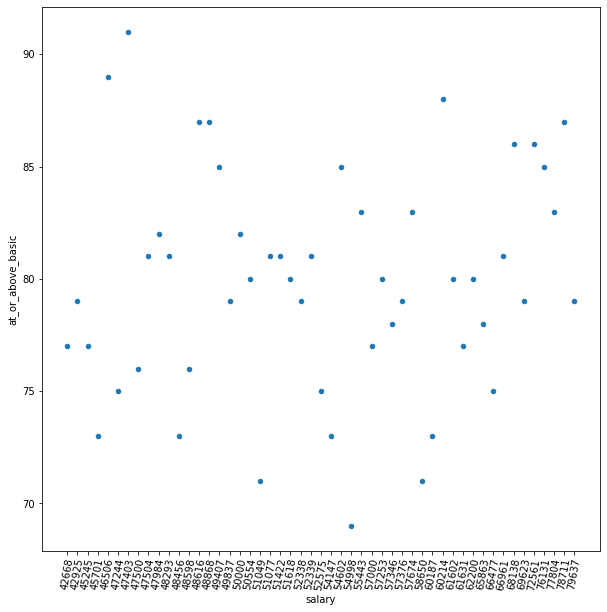

In [19]:
# Create Scatterplot
final_df.sort_values(by=['salary'], inplace=True, ascending=True)
plot = final_df.plot.scatter(x = 'salary', y = 'at_or_above_basic', rot=80, figsize = (10,10))
fig = plot.get_figure()
fig.savefig("output.png")

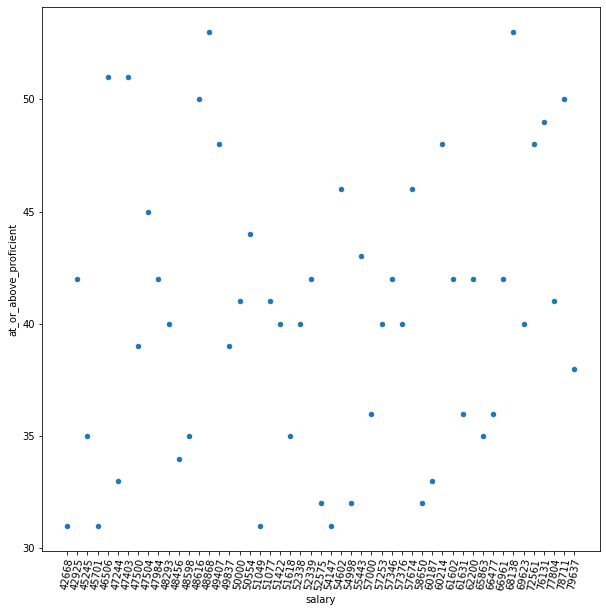

In [20]:
# Create other Scatterplot
final_df_2.sort_values(by=['salary'], inplace=True, ascending=True)
plot2 = final_df_2.plot.scatter(x = 'salary', y = 'at_or_above_proficient', rot=80, figsize = (10,10))
fig2 = plot2.get_figure()
fig2.savefig("output2.png")

In [ ]:
connection_string = "postgres:0217@localhost:5432/Student Performance"
engine = create_engine(f'postgresql://{connection_string}')

In [ ]:
# Confirm tables
engine.table_names()

In [ ]:
salary_df.to_sql(name='salary', con=engine, if_exists='append', index=False)

In [ ]:
performance_df.to_sql(name='performance', con=engine, if_exists='append', index=False)